In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from mpitree.decision_tree import DecisionTreeClassifier

In [2]:
iris = load_iris(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data.iloc[:, :2], iris.target, test_size=0.20, random_state=42
)

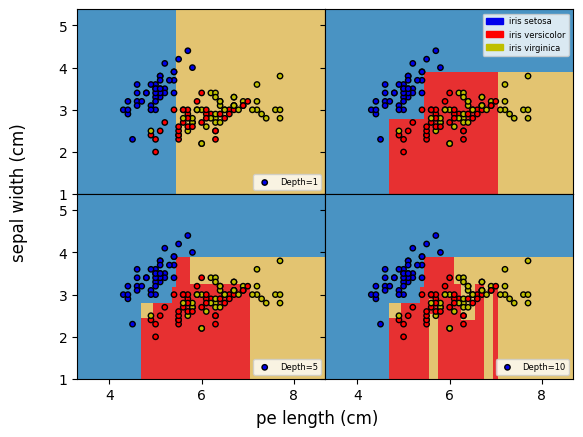

In [3]:
h = 0.02  # step size in the mesh

a = "#4993c3"
b = "#e73031"
c = "#e3c471"

aa = "#0000ec"
bb = "#ff0000"
cc = "#bfbf00"

# Create color maps
cmap_light = ListedColormap([a, b, c])
cmap_bold = ListedColormap([aa, bb, cc])

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex="col", sharey="row")

depths = [1, 3, 5, 10]
coor = [ax1, ax2, ax3, ax4]

for depth, ax in zip(depths, coor):
    clf = DecisionTreeClassifier(criterion={"max_depth": depth}).fit(X_train, y_train)

    x_min, x_max = X_train.to_numpy()[:, 0].min() - 1, X_train.to_numpy()[:, 0].max() + 1
    y_min, y_max = X_train.to_numpy()[:, 1].min() - 1, X_train.to_numpy()[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_t = pd.DataFrame(
        np.c_[xx.ravel(), yy.ravel()], columns=["sepal length (cm)", "sepal width (cm)"]
    )
    Z = np.array(
        [clf.predict(X_t.iloc[x]) for x in range(len(X_t))]
    )

    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    ax.scatter(
        X_train.to_numpy()[:, 0],
        X_train.to_numpy()[:, 1],
        c=y_train.to_numpy(),
        cmap=cmap_bold,
        s=15,
        edgecolors="black",
        label=f"Depth={depth}",
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.legend(loc="lower right", prop={"size": 6}, fancybox=True)

    if depth == 3:
        red_patch = mpatches.Patch(color=aa, label="iris setosa")
        green_patch = mpatches.Patch(color=bb, label="iris versicolor")
        blue_patch = mpatches.Patch(color=cc, label="iris virginica")
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=[red_patch, green_patch, blue_patch], prop={"size": 6})

fig.supxlabel("pe length (cm)")
fig.supylabel("sepal width (cm)")

plt.show()

In [4]:
def plot_tree_clf_boundary(clf, X, y, /, *, feature_names=None):
    X = X.to_numpy()
    y = y.to_numpy()

    h = 0.02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(["#4993c3", "#e73031", "#e3c471"])
    cmap_bold = ListedColormap(["#0000ec", "#ff0000", "#bfbf00"])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_t = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=feature_names)

    Z = np.array([clf.predict(X_t.iloc[x]) for x in range(len(X_t))])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap_bold,
        edgecolors="black",
        linewidths=1.5,
    )

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title(f"Decision Tree Classifier")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

    plt.show()

In [5]:
clf = DecisionTreeClassifier(criterion={"max_depth": 3})
clf.fit(X_train, y_train)

print(clf)

train_score, test_score = clf.score(X_train, y_train), clf.score(X_test, y_test)
print(f"\nTrain-Test Accuracy: ({train_score:.2%}, {test_score:.2%})")

┌── sepal length (cm)
│  ├── sepal width (cm) [< 5.45]
│  │  ├── sepal length (cm) [< 2.80]
│  │  │  └── 0 [< 4.70]
│  │  │  └── 1 [>= 4.70]
│  │  ├── sepal length (cm) [>= 2.80]
│  │  │  └── 0 [< 5.35]
│  │  │  └── 0 [>= 5.35]
│  ├── sepal width (cm) [>= 5.45]
│  │  ├── sepal length (cm) [< 3.90]
│  │  │  └── 1 [< 7.05]
│  │  │  └── 2 [>= 7.05]
│  │  └── 0 [>= 3.90]

Train-Test Accuracy: (75.00%, 63.33%)


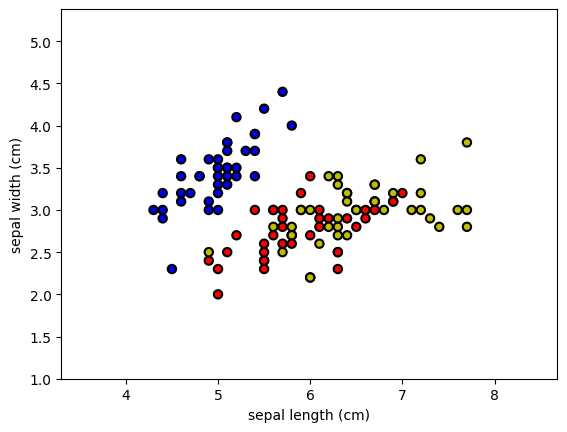

In [6]:
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#4993c3", "#e73031", "#e3c471"])
cmap_bold = ListedColormap(["#0000ec", "#ff0000", "#bfbf00"])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train.to_numpy()[:, 0].min() - 1, X_train.to_numpy()[:, 0].max() + 1
y_min, y_max = X_train.to_numpy()[:, 1].min() - 1, X_train.to_numpy()[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot also the training points
plt.scatter(
    X_train.to_numpy()[:, 0],
    X_train.to_numpy()[:, 1],
    c=y_train.to_numpy(),
    cmap=cmap_bold,
    edgecolors="black",
    linewidths=1.5,
)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show()

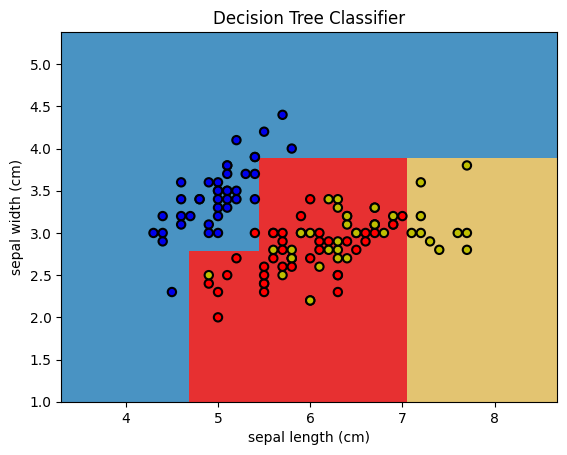

In [7]:
plot_tree_clf_boundary(
    clf,
    X_train,
    y_train,
    feature_names=["sepal length (cm)", "sepal width (cm)"],
)

In [8]:
X = pd.DataFrame(np.random.default_rng().random((50, 2)) * 5, columns=["x_1", "x_2"])
y = pd.DataFrame(np.random.default_rng().choice(50, size=(50,)) * 5, columns=["y"])

y = y.apply(lambda f: f % 3).iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print(clf)
train_score, test_score = clf.score(X_train, y_train), clf.score(X_test, y_test)
print(f"\nTrain-Test Accuracy: ({train_score:.2%}, {test_score:.2%})")

┌── x_2
│  ├── x_1 [< 0.99]
│  │  └── 2 [< 3.28]
│  │  └── 1 [>= 3.28]
│  ├── x_2 [>= 0.99]
│  │  └── 0 [< 1.54]
│  │  ├── x_2 [>= 1.54]
│  │  │  ├── x_1 [< 3.78]
│  │  │  │  ├── x_1 [< 0.70]
│  │  │  │  │  └── 2 [< 0.28]
│  │  │  │  │  ├── x_1 [>= 0.28]
│  │  │  │  │  │  └── 1 [< 0.38]
│  │  │  │  │  │  └── 2 [>= 0.38]
│  │  │  │  ├── x_1 [>= 0.70]
│  │  │  │  │  ├── x_2 [< 1.64]
│  │  │  │  │  │  └── 2 [< 2.54]
│  │  │  │  │  │  └── 0 [>= 2.54]
│  │  │  │  │  ├── x_1 [>= 1.64]
│  │  │  │  │  │  ├── x_1 [< 2.49]
│  │  │  │  │  │  │  ├── x_1 [< 2.09]
│  │  │  │  │  │  │  │  └── 1 [< 1.78]
│  │  │  │  │  │  │  │  └── 2 [>= 1.78]
│  │  │  │  │  │  │  └── 1 [>= 2.09]
│  │  │  │  │  │  ├── x_2 [>= 2.49]
│  │  │  │  │  │  │  ├── x_2 [< 2.78]
│  │  │  │  │  │  │  │  ├── x_1 [< 2.14]
│  │  │  │  │  │  │  │  │  ├── x_1 [< 4.18]
│  │  │  │  │  │  │  │  │  │  └── 0 [< 3.39]
│  │  │  │  │  │  │  │  │  │  └── 2 [>= 3.39]
│  │  │  │  │  │  │  │  │  └── 0 [>= 4.18]
│  │  │  │  │  │  │  │  ├── x_1 [>

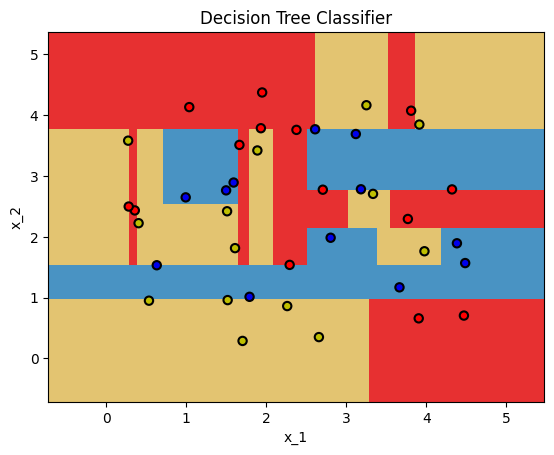

In [10]:
plot_tree_clf_boundary(clf, X_train, y_train, feature_names=["x_1", "x_2"])

In [11]:
size = 4
p = 2
n_ranks = [range(4), range(8)]

for ranks in n_ranks:
    for rank in ranks:
        dist = size // p
        color = rank // dist % p
        key = rank % dist + dist * (rank >= dist * p)

        print(f"Rank={rank}  Color={color}  Key={key}")
    print()

Rank=0  Color=0  Key=0
Rank=1  Color=0  Key=1
Rank=2  Color=1  Key=0
Rank=3  Color=1  Key=1

Rank=0  Color=0  Key=0
Rank=1  Color=0  Key=1
Rank=2  Color=1  Key=0
Rank=3  Color=1  Key=1
Rank=4  Color=0  Key=2
Rank=5  Color=0  Key=3
Rank=6  Color=1  Key=2
Rank=7  Color=1  Key=3

